In [4]:
# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [59]:
# two component model
def two_component_model(states,t):
    # Our "states" list has the state variables in the following order:
    # HK, HKp, RR, RRp, HKpRR, HKRRp
    HK = states[0]
    HKp = states[1]
    RR = states[2]
    RRp = states[3]
    HKpRR = states[4]
    HKRRp = states[5]
   
    ### implement the change equations
    HK_prime = -k_a*HK + k_u*HKp + k_cat *HKpRR -k_p*HK*RRp + k_m*HKRRp + k_cat*HKRRp
    HKp_prime = -k_u*HKp + k_a*HK - k_p*HKp*RR + k_m*HKpRR
    RR_prime = -k_p*RR*HKp + k_m*HKpRR + k_cat*HKRRp
    RRp_prime = k_cat*HKpRR -k_p*HK*RRp +k_m*HKRRp
    HKpRR_prime = -k_m*HKpRR + k_p*HKp*RR - k_cat*HKpRR
    HKRRp_prime = k_p*HK*RRp -k_m*HKRRp - k_cat*HKRRp

    ###
    
    statesprime = [HK_prime, HKp_prime,RR_prime, RRp_prime, HKpRR_prime, HKRRp_prime]
    return statesprime

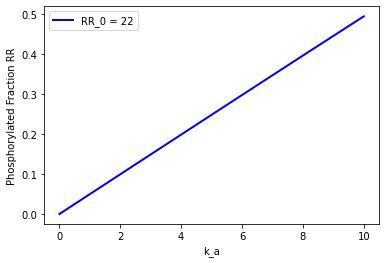

In [63]:
# STEADY-STATE responses of two component model PART 1

# INITIAL CONCENTRATIONS & PARAMETERS 
# This is where we will define the initial conditions and parameters that we won't change for different simulations

#initial conditions
HK_0 = 1
HKp_0 = 0
RR_0 = 22
RRp_0 = 0
HKpRR_0 = 0
HKRRp_0 = 0
states0 = [HK_0, HKp_0, RR_0, RRp_0, HKpRR_0, HKRRp_0]

#parameters
k_a = 1
k_u = 0.1
k_p = 1
k_m = 0.1
k_cat = 1

# Here, we define our list of k_a values:
k_a_values = np.linspace(0, 10)

#These will be the lists that hold the results
ss_results = []

for k_a in k_a_values:
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    t = np.linspace(0,1000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(two_component_model,states0,t)
    # Now, calculate our steady state output, RRp/RR_0
    output = solution[999,3]/RR_0
    # Append this result to the vector of our results
    ss_results.append(output)

plt.plot(k_a_values,ss_results,'b-',linewidth=2, label = "RR_0 = "+str(RR_0))
plt.xlabel('k_a')
plt.ylabel('Phosphorylated Fraction RR')
plt.legend()
plt.show()

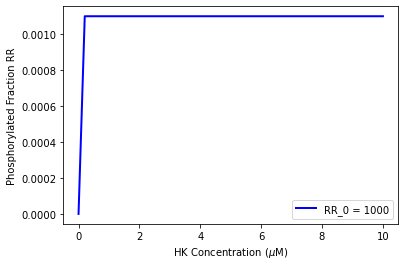

In [61]:
# STEADY-STATE responses of two component model PART2

# INITIAL CONCENTRATIONS & PARAMETERS
# This is where we will define the initial conditions and parameters that we won't change for different simulations

#initial conditions
HK_0 = 1
HKp_0 = 0
RR_0 = 1000
RRp_0 = 0
HKpRR_0 = 0
HKRRp_0 = 0
states0 = [HK_0, HKp_0, RR_0, RRp_0, HKpRR_0, HKRRp_0]

#parameters
k_a = 1
k_u = 0.1
k_p = 1
k_m = 0.1
k_cat = 1

# Here, we define our list of HK values:
HK_values = np.linspace(0, 10)

#These will be the lists that hold the results
ss_results = []

for HK_0 in HK_values:
    #First define the initial conditions for the new value of HK_0
    states0 = [HK_0, HKp_0, RR_0, RRp_0, HKpRR_0, HKRRp_0]
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    t = np.linspace(0,1000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(two_component_model,states0,t)
    # Now, calculate our steady state output, RRp/RR_0
    output = solution[999,3]/RR_0
    # Append this result to the vector of our results
    ss_results.append(output)

plt.plot(k_a_values,ss_results,'b-',linewidth=2, label = "RR_0 = "+str(RR_0))
plt.xlabel('HK Concentration ($\mu$M)')
plt.ylabel('Phosphorylated Fraction RR')
plt.legend()
plt.show()

In [17]:
# chemotaxis model
def chemotaxis_model(states,t):
    # Our "states" list has the state variables in the following order:
    # CheA, CheAp, CheY, CheYp, CheApCheY, CheZCheYp
    CheA = states[0]
    CheAp = states[1]
    CheY = states[2]
    CheYp = states[3]
    CheZ = states[4]
    CheApCheY = states[5]
    CheZCheYp = states[6]
   
    ### implement the change equations
    CheA_prime = -k_a*CheA + k_u*CheAp + k_cat*CheApCheY
    CheAp_prime = k_a*CheA -k_u*CheAp + k_m*CheApCheY - k_p*CheAp*CheY
    CheY_prime = -k_p*CheAp*CheY + k_m*CheApCheY + k_cat*CheZCheYp
    CheYp_prime = k_cat*CheApCheY - k_p*CheZ*CheYp + k_m*CheZCheYp
    CheZ_prime = -k_p*CheZ*CheYp + k_m*CheZCheYp + k_cat*CheZCheYp
    CheApCheY_prime = k_p*CheAp*CheY - k_m*CheApCheY - k_cat*CheApCheY
    CheZCheYp_prime = k_p*CheZ*CheYp -k_m*CheZCheYp -k_cat*CheZCheYp
    ###
    
    statesprime = [CheA_prime, CheAp_prime,CheY_prime, CheYp_prime, CheZ_prime, CheApCheY_prime, CheZCheYp_prime]
    return statesprime

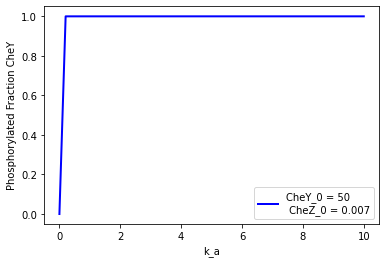

In [30]:
# STEADY-STATE responses of chemotaxis model

# INITIAL CONCENTRATIONS & PARAMETERS 
# This is where we will define the initial conditions and parameters that we won't change for different simulations

#initial conditions
CheA_0 = 1
CheAp_0 = 0
CheY_0 = 50
CheYp_0 = 0
CheZ_0 = 0.007
CheApCheY_0 = 0
CheZCheYp_0 = 0
states0 = [CheA_0, CheAp_0,CheY_0, CheYp_0, CheZ_0, CheApCheY_0, CheZCheYp_0]

#parameters
k_a = 1
k_u = 0.1
k_p = 1
k_m = 0.1
k_cat = 1

# Here, we define our list of k_a values:
k_a_values = np.linspace(0, 10)

#These will be the lists that hold the results
ss_results = []

for k_a in k_a_values:
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    t = np.linspace(0,1000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(chemotaxis_model,states0,t)
    # Now, calculate our steady state output, CheYp/CheY_0
    output = solution[999,3]/CheY_0
    # Append this result to the vector of our results
    ss_results.append(output)

plt.plot(k_a_values,ss_results,'b-',linewidth=2, label = "CheY_0 = "+str(CheY_0)+"\n CheZ_0 = " +str(CheZ_0))
plt.xlabel('k_a')
plt.ylabel('Phosphorylated Fraction CheY')
plt.legend()
plt.show()

In [31]:
# perfect adaptation model
def perfect_adaptation_model(states,t):
    # Our "states" list has the state variables in the following order:
    # CheY, CheYp
    CheY = states[0]
    CheYp = states[1]
   
    CheY_prime = -Va + Vz*(CheYp/(Kz+CheYp))
    CheYp_prime = +Va - Vz*(CheYp/(Kz+CheYp))
    
    statesprime = [CheY_prime, CheYp_prime]
    return statesprime

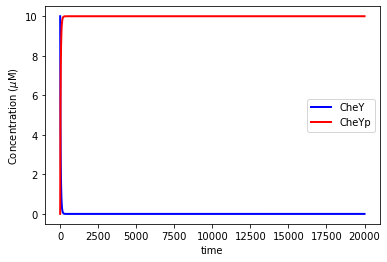

In [49]:
# Responses of perfect adaptation model

# INITIAL CONCENTRATIONS & PARAMETERS 
# This is where we will define the initial conditions and parameters that we won't change for different simulations

#initial conditions
CheY_0 = 10
CheYp_0 = 0 #you will need to change this value
states0 = [CheY_0, CheYp_0]

#parameters
Va = 0.5
Vz = 1
Kz = 10

# To intgrate ODEs, we need a "t" vector for time
# Note that the units on "t" are in seconds
t = np.linspace(0,20000,1000)
# Now, integrate the ODEs and put the results in "solution"
solution = odeint(perfect_adaptation_model,states0,t)

plt.plot(t,solution[:, 0],'b-',linewidth=2, label = "CheY")
plt.plot(t,solution[:, 1],'r-',linewidth=2, label = "CheYp")
plt.xlabel('time')
plt.ylabel('Concentration ($\mu$M)')
plt.legend()
plt.show()

In [50]:
# perfect adaptation model with transient spike
def perfect_adapt_spike_model(states,t):
    # Our "states" list has the state variables in the following order:
    # CheY, CheYp
    CheY = states[0]
    CheYp = states[1]
    
    if t_on <t< t_off:
        CheYp = CheYp + spike
   
    CheY_prime = -Va + Vz*(CheYp/(Kz+CheYp))
    CheYp_prime = +Va - Vz*(CheYp/(Kz+CheYp))
    
    statesprime = [CheY_prime, CheYp_prime]
    return statesprime

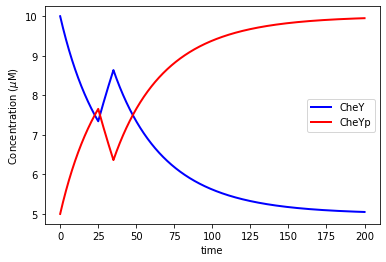

In [58]:
# Responses of perfect adaptation model with spike

# INITIAL CONCENTRATIONS & PARAMETERS 
# This is where we will define the initial conditions and parameters that we won't change for different simulations

#initial conditions
CheY_0 = 10
CheYp_0 = 5 #you will need to change this value
states0 = [CheY_0, CheYp_0]

#parameters
Va = 0.5
Vz = 1
Kz = 10

#spike parameters
t_on = 25
t_off = 35
spike = 10

# To intgrate ODEs, we need a "t" vector for time
# Note that the units on "t" are in seconds
t = np.linspace(0,200,10000)
# Now, integrate the ODEs and put the results in "solution"
solution = odeint(perfect_adapt_spike_model,states0,t)

plt.plot(t,solution[:, 0],'b-',linewidth=2, label = "CheY")
plt.plot(t,solution[:, 1],'r-',linewidth=2, label = "CheYp")
plt.xlabel('time')
plt.ylabel('Concentration ($\mu$M)')
plt.legend()
plt.show()